In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from proofreader.utils.vis import plot_3d
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [59]:
from proofreader.data.cremi import prepare_cremi_vols

train_vols, test_vols = prepare_cremi_vols('../../dataset/cremi')

In [ ]:
from proofreader.data.splitter import SplitterDataset
from proofreader.data.augment import Augmentor
num_slices = [1, 4]
radius = 96
context_slices = 6
num_points = 1024

augmentor = Augmentor(center=True, shuffle=True, rotate=True, scale=True)
dataset = SplitterDataset(train_vols, num_slices, radius, context_slices, num_points=num_points, torch=False, open_vol=True, verbose=True, Augmentor=augmentor)
print(len(dataset))

In [ ]:
from proofreader.utils.vis import plot_3d
%matplotlib widget
num = 10
lim = (-.1,.1)
lim = (lim,lim,lim)
print(lim)
for i in range(0, num):
    rand_i = random.randint(0, len(dataset))
    pc, label = dataset[rand_i]
    pc = np.swapaxes(pc, 0, 1)
    plot_3d(pc, lims=lim)



In [ ]:
from proofreader.data.splitter import SplitterTest
from proofreader.data.augment import Augmentor
num_slices = [1, 4]
radius = 96
context_slices = 3
num_points = 1024

tester = SplitterTest(test_vols, num_slices, radius, context_slices, num_points=num_points)


In [66]:
def correspond_labels(key, val, bg_label=0):
    res = {}
    classes = np.unique(key)
    for c in classes:
        if c != bg_label:
            corr, counts = np.unique(val[key==c], return_counts=True)
            if len(corr) != 1:
                print('warn multiple correspondance')
            res[c] = corr
    return res



In [67]:
import cc3d
from proofreader.utils.vis import grid_volume
from skimage import color

tr = test_vols[1].copy()
re = np.zeros_like(tr)
re[1:4] = tr[1:4]
re[8:10] = tr[8:10]
re = cc3d.connected_components(re)
dic = correspond_labels(re, tr)

print(dic)


{1: array([1], dtype=uint32), 2: array([2], dtype=uint32), 3: array([3], dtype=uint32), 4: array([4], dtype=uint32), 5: array([5], dtype=uint32), 6: array([6], dtype=uint32), 7: array([7], dtype=uint32), 8: array([8], dtype=uint32), 9: array([9], dtype=uint32), 10: array([12], dtype=uint32), 11: array([10], dtype=uint32), 12: array([11], dtype=uint32), 13: array([13], dtype=uint32), 14: array([14], dtype=uint32), 15: array([15], dtype=uint32), 16: array([16], dtype=uint32), 17: array([17], dtype=uint32), 18: array([184], dtype=uint32), 19: array([18], dtype=uint32), 20: array([21], dtype=uint32), 21: array([19], dtype=uint32), 22: array([22], dtype=uint32), 23: array([20], dtype=uint32), 24: array([23], dtype=uint32), 25: array([24], dtype=uint32), 26: array([26], dtype=uint32), 27: array([25], dtype=uint32), 28: array([28], dtype=uint32), 29: array([29], dtype=uint32), 30: array([27], dtype=uint32), 31: array([30], dtype=uint32), 32: array([31], dtype=uint32), 33: array([33], dtype=ui

warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, multiple correspondance
warn, mult

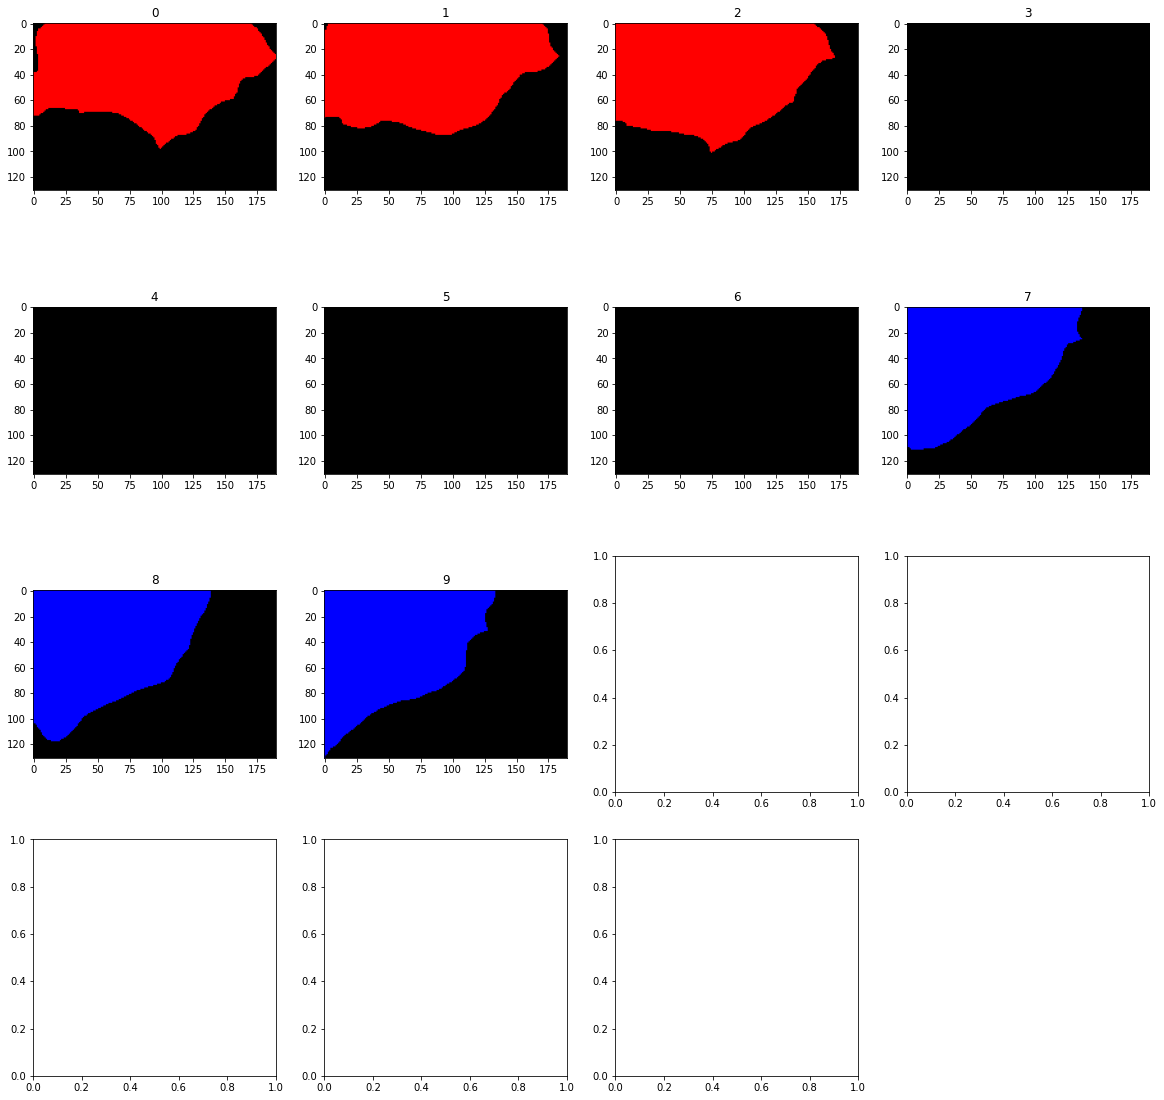

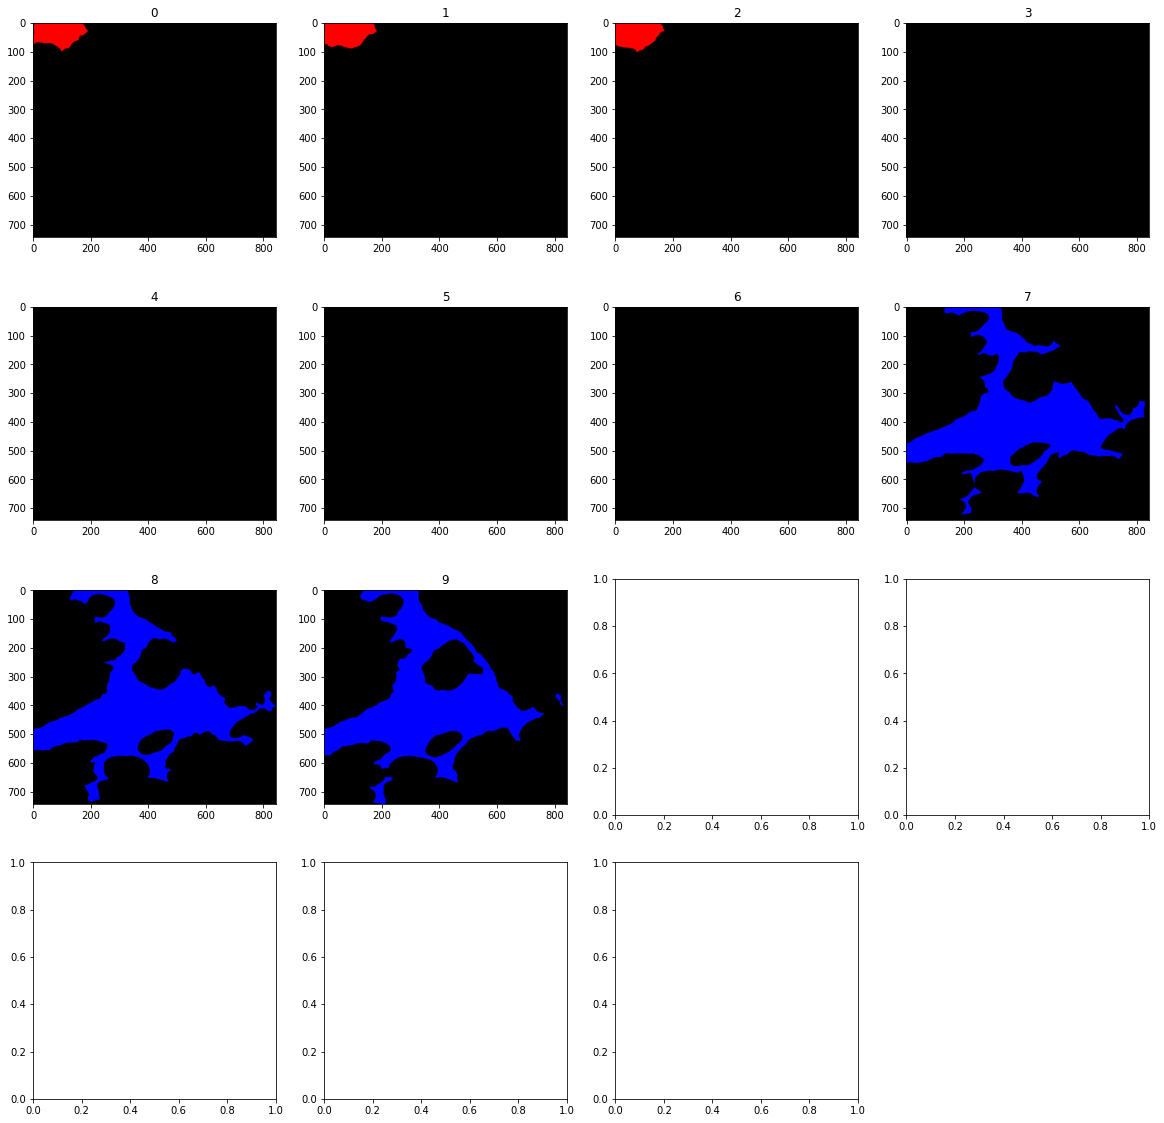

KeyboardInterrupt: 

In [55]:
def model(x):
    pass


examples = tester.test_iter(test_vols[1], model, (4,8))
print(examples.shape)
# for e in examples:
#     pc = np.swapaxes(pc, 0, 1)
#     plot_3d(pc, lims=lim)